# Reduced coverage experiments
Where the set of entries contrained in one thesaurus is constrained to match another, smaller thesaurus. This lets us look at performance differences due to 

 - higher coverage of space of all words/phrases (due to different filtering or algorithm specifics), versus 
 - better vector quality
 
There are currently (19-5-15) two sets of such experiments, both for NPs only:
 - w2v vectors reduced to the coverage of count-windows vectors
 - count-windows reduced to coverage of Baroni vector

In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from copy import deepcopy
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names
from pprint import pprint

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
def plot_matching(exp_with_constraints, labels=None, rotation=60):
    matching = []
    for e in exp_with_constraints:
        settings = settings_of(e.id)
        settings['expansions__entries_of_id'] = None
        matching.append(Experiment.objects.get(**settings))
    
    ids1 = list(exp_with_constraints.values_list('id', flat=True))
    ids2 = [x.id for x in matching]
    print(ids1, '--->', ids2)
    if not labels:
        labels = ['%s-%s'%(a.id, b.id) for a,b in zip(exp_with_constraints, matching)]
    diff_plot_bar([ids1, ids2], ['Limited', 'Unlimited'],
                  labels, rotation=rotation, hue_order=['Unlimited', 'Limited'])

# count windows vectors (add, mult, ...) reduced to Baroni's coverage
we know they are better and have a higher coverage, so can reducing the coverage reduce the accuracy too

[216, 218, 220, 222] ---> [27, 28, 29, 30]
Running significance for experiments [216, 27]
Original difference 0.048976002179
p-value 0.0
Running significance for experiments [218, 28]
Original difference 0.0536240568762
p-value 0.0
Running significance for experiments [220, 29]
Original difference 0.000399012705532
p-value 0.9299999999999999
Running significance for experiments [222, 30]
Original difference 0.0148783073972
p-value 0.23399999999999999
Calculating CI for exp 216
Calculating CI for exp 27
Calculating CI for exp 218
Calculating CI for exp 28
Calculating CI for exp 220
Calculating CI for exp 29
Calculating CI for exp 222
Calculating CI for exp 30


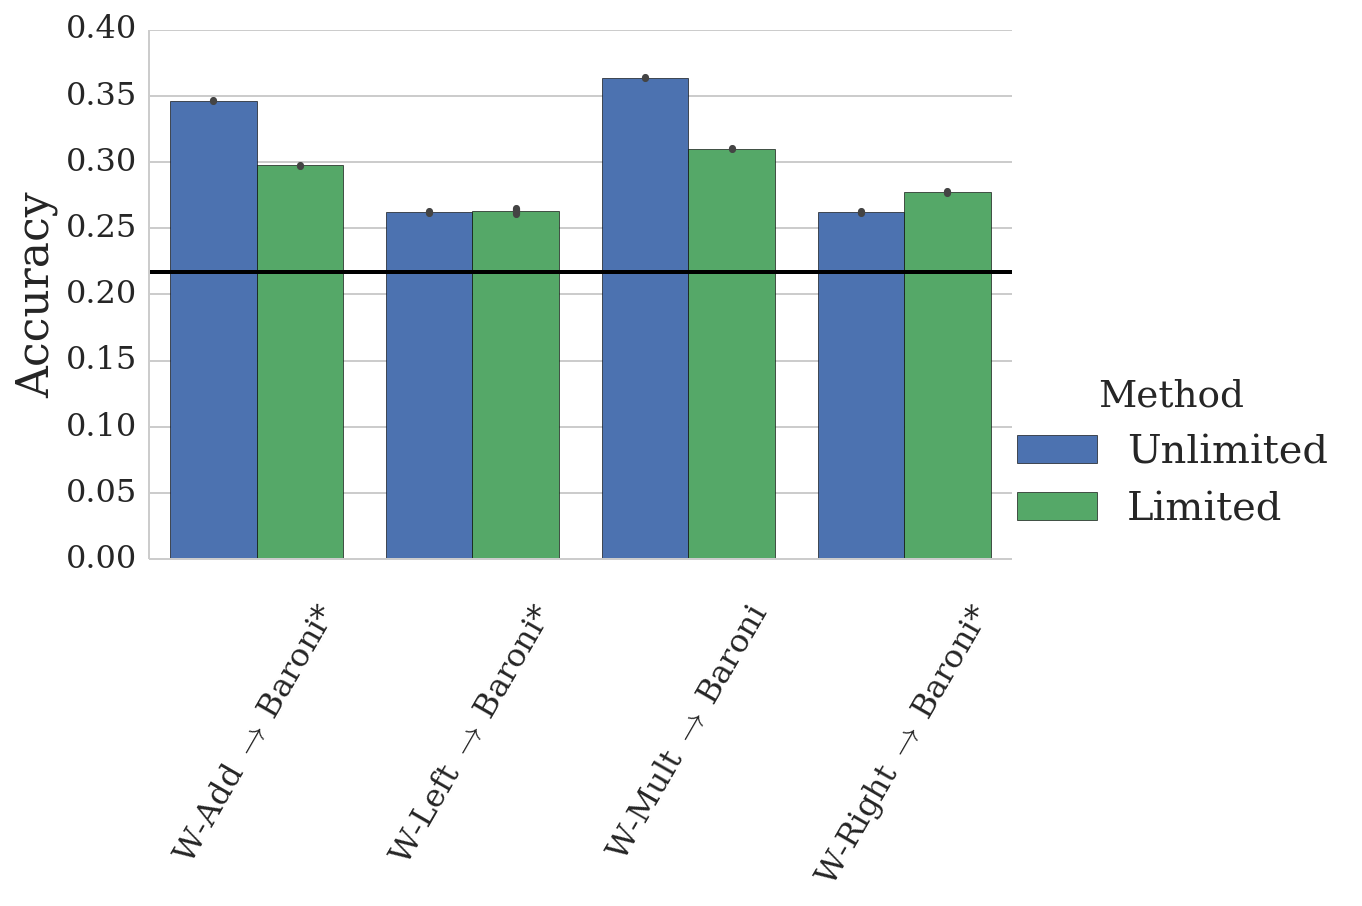

In [3]:
experiments = Experiment.objects.filter(expansions__entries_of__isnull=False, 
                                        expansions__entries_of__composer='Baroni')
names = pretty_names([x.id for x in experiments])
names = [r'%s $\rightarrow$ Baroni' % n for n in names]

plot_matching(experiments, labels=names)
plt.axhline(random_vect_baseline(), c='k');
plt.savefig('plot-reduced-coverage1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# word2vec reduced to coverage of count windows (there shouldn't be a difference)

[215, 217, 219, 221] ---> [34, 35, 36, 37]
Running significance for experiments [215, 34]
Original difference 0.00606289849502
p-value 0.48
Running significance for experiments [217, 35]
Original difference 0.00680536095205
p-value 0.22399999999999998
Running significance for experiments [219, 36]
Original difference 0.00695392556327
p-value 0.478
Running significance for experiments [221, 37]
Original difference 0.0173958623003
p-value 0.11599999999999999
Calculating CI for exp 215
Calculating CI for exp 217
Calculating CI for exp 219
Calculating CI for exp 221


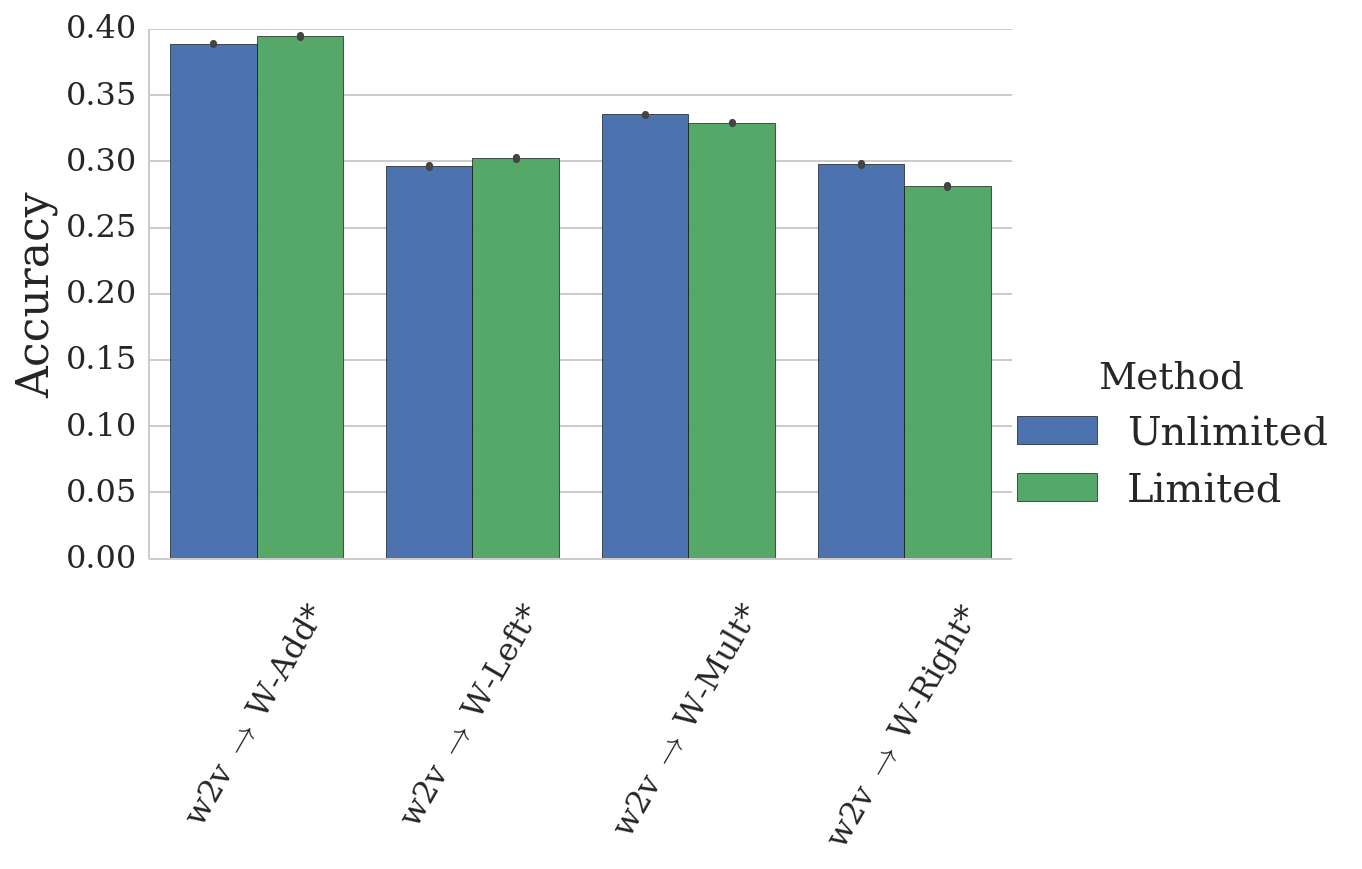

In [4]:
exp_ids = Experiment.objects.filter(expansions__entries_of__isnull=False).exclude(expansions__entries_of__composer='Baroni')
names = pretty_names([x.id for x in exp_ids], name_format=['expansions__vectors__composer'])
names = ['w2v $\\rightarrow$ W-%s' % n for n in names]
plot_matching(exp_ids, labels=names)
# plt.axhline(random_vect_baseline(), c='k');
plt.savefig('plot-reduced-coverage2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)